# Models Inverse Kinematics

## Imports

In [5]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from utils import dispIK_2R, dispIK_3R, Model, angular_loss

In [6]:
models_dir = 'models'
MODELS_2R = []
MODELS_3R = []

if os.path.exists(models_dir) and os.path.isdir(models_dir):
    for filename in os.listdir(models_dir):
        filepath = os.path.join(models_dir, filename)
        if os.path.isfile(filepath) and filename.endswith('.keras'):
            if '2R' in filename:
                print(f"2R Model found : {filename}")
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                MODELS_2R.append(model)
            elif '3R' in filename:
                print(f"3R Model found : {filename}")
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                MODELS_3R.append(model)
else:
    print(f"The folder '{models_dir}' does not exists!")


print(f"Number of 2R models : {len(MODELS_2R)}")
print(f"Number of 3R models : {len(MODELS_3R)}")

2R Model found : NN1_2R_p10.0_e30.keras
3R Model found : NN1_3R_p10.0_e30_raw.keras
2R Model found : NN1_2R_p10.0_e30_raw.keras
3R Model found : NN1_3R_p10.0_e30.keras
Number of 2R models : 2
Number of 3R models : 2


===== Step n°0 =====
Current Position: [-0.00916214  0.1579395 ]
Intermediate joint angles: [0.7853982 1.5707964]

===== Step n°1 =====
Current Position: [ 0.03231422 -0.00847045]
Intermediate joint angles: [-2.1416264  2.652951 ]

===== Step n°2 =====
Current Position: [-0.15444916  0.087836  ]
Intermediate joint angles: [2.058216  1.1719372]

===== Step n°3 =====
Current Position: [0.14355059 0.13215688]
Intermediate joint angles: [-3.6411605  7.6051483]

===== Step n°4 =====
Current Position: [0.14808752 0.00503696]
Intermediate joint angles: [-2.4734051  6.6668243]

===== Step n°5 =====
Current Position: [1.4999999e-01 2.2258610e-07]
Intermediate joint angles: [-2.4269984  6.649861 ]

Converegence reached in 5 steps
Computed joint angles for target position [0.15, 0]: (j0, j1) = [-2.4269984  6.649861 ]


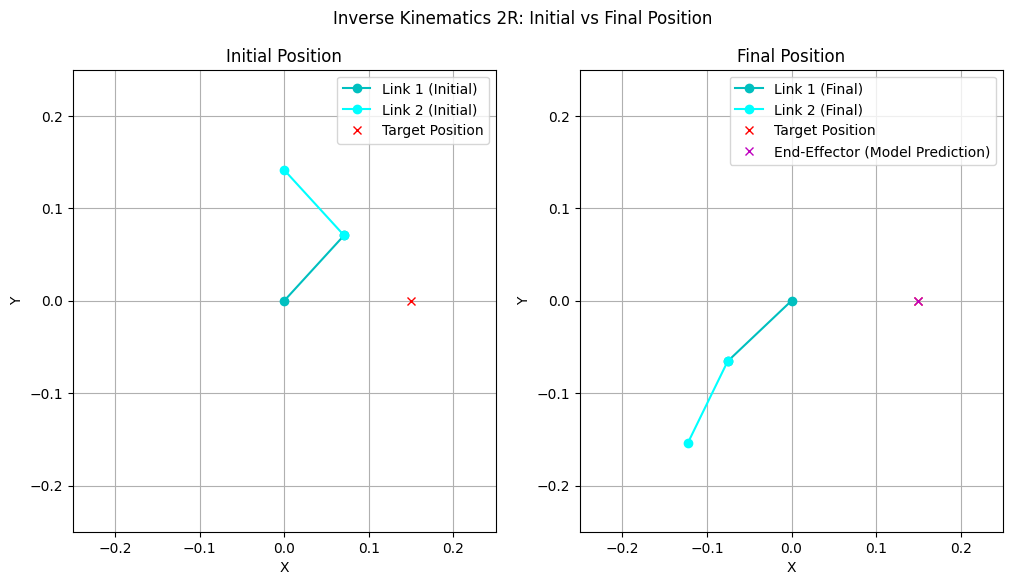

Distance error: 0.3129498064517975



In [7]:
model_2R = MODELS_2R[1].model
name_2R = MODELS_2R[1].get_name()

if 'raw' in name_2R:
    raw = True
else: 
    raw = False
    
target_position = [0.15, 0] 
initial_guess = [np.pi/4, np.pi/2]  
dispIK_2R(model_2R, target_position, initial_guess, raw, display_error=True)

===== Step n°0 =====
Current Position: [ 0.2820755  -0.04067921]
Intermediate joint angles: [-0.7853982  0.5235988  0.7853982]

===== Step n°1 =====
Current Position: [ 0.00753072 -0.01759433]
Intermediate joint angles: [-1.9055471  1.9503882  2.2055166]

===== Step n°2 =====
Current Position: [-0.1754635  -0.10581443]
Intermediate joint angles: [-2.7451792  5.6536474  2.0569773]

===== Step n°3 =====
Current Position: [-0.09388687  0.08871473]
Intermediate joint angles: [-3.4163172  5.5331783  3.262641 ]

===== Step n°4 =====
Current Position: [0.09127629 0.22151649]
Intermediate joint angles: [-4.3571734  4.5485783  1.0685265]

===== Step n°5 =====
Current Position: [-0.13053682 -0.14133978]
Intermediate joint angles: [-2.5664272  1.1832948  3.5671818]

===== Step n°6 =====
Current Position: [-0.18342674  0.09700773]
Intermediate joint angles: [-4.3064985   0.20155656  1.7623091 ]

===== Step n°7 =====
Current Position: [-0.1965613   0.10028236]
Intermediate joint angles: [-4.225155 

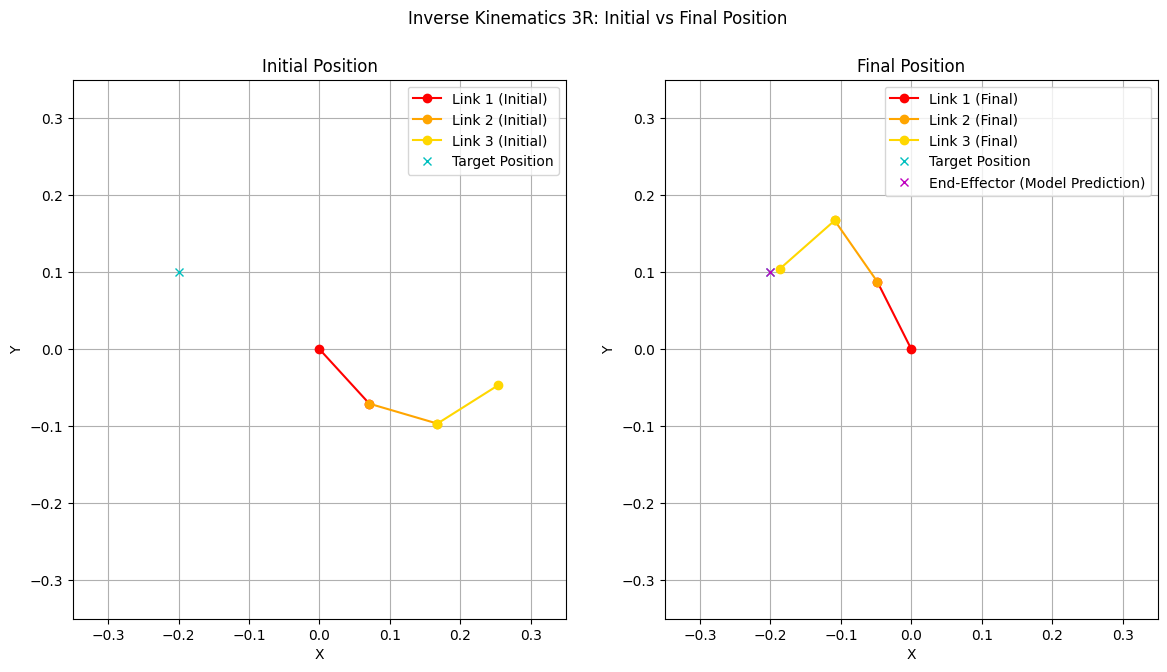

Distance error: 0.014093353413045406



In [8]:
model_3R = MODELS_3R[1].model
name_3R = MODELS_3R[1].get_name()

if 'raw' in name_3R:
    raw = True
else: 
    raw = False

target_position = [-0.2, 0.1] 
initial_guess = [-np.pi/4, np.pi/6, np.pi/4]  
dispIK_3R(model_3R, target_position, initial_guess, raw, display_error=True)